<a href="https://colab.research.google.com/github/KIRTIKUMARKK21/Data-Science/blob/master/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prblm statement-->> predict the total number of confirmed cases

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
 from fbprophet import Prophet
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [ ]:
df=pd.read_csv("covid_19_clean_complete.csv")

In [ ]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.isna().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [ ]:
total=df.groupby(['Date'])['Confirmed','Deaths','Recovered','Active'].sum().reset_index()

In [ ]:
total.head()

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [ ]:
df_prophet=total.rename(columns={'Date':'ds','Confirmed':'y'})

In [ ]:
df_prophet.head()

,ds,y,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [ ]:
m=Prophet()

In [ ]:
model=m.fit(df_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
model.seasonalities

OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [ ]:
### ### now I am going to do forecasting so to do forecasting I need some Future Days 
future_global=model.make_future_dataframe(periods=30,freq='D')

In [ ]:
future_global.head()

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [ ]:
df_prophet.shape

(188, 5)

In [ ]:
future_global.shape

(218, 1)

In [ ]:
df_prophet['ds'].tail()

183   2020-07-23
184   2020-07-24
185   2020-07-25
186   2020-07-26
187   2020-07-27
Name: ds, dtype: datetime64[ns]

In [ ]:
future_global.tail()

,ds
213,2020-08-22
214,2020-08-23
215,2020-08-24
216,2020-08-25
217,2020-08-26


In [ ]:
prediction=model.predict(future_global)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.268944e+03,-1.274228e+05,8.139507e+04,-9.268944e+03,-9.268944e+03,-11031.780803,-11031.780803,-11031.780803,-11031.780803,-11031.780803,-11031.780803,0.0,0.0,0.0,-2.030072e+04
1,2020-01-23,-6.571116e+03,-1.178169e+05,9.729369e+04,-6.571116e+03,-6.571116e+03,-1113.669082,-1113.669082,-1113.669082,-1113.669082,-1113.669082,-1113.669082,0.0,0.0,0.0,-7.684785e+03
2,2020-01-24,-3.873289e+03,-1.005477e+05,1.166569e+05,-3.873289e+03,-3.873289e+03,10057.601578,10057.601578,10057.601578,10057.601578,10057.601578,10057.601578,0.0,0.0,0.0,6.184313e+03
3,2020-01-25,-1.175461e+03,-9.872070e+04,1.124153e+05,-1.175461e+03,-1.175461e+03,13760.408704,13760.408704,13760.408704,13760.408704,13760.408704,13760.408704,0.0,0.0,0.0,1.258495e+04
4,2020-01-26,1.522366e+03,-9.303359e+04,1.100003e+05,1.522366e+03,1.522366e+03,7282.468544,7282.468544,7282.468544,7282.468544,7282.468544,7282.468544,0.0,0.0,0.0,8.804834e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2020-08-22,2.143771e+07,2.106786e+07,2.184328e+07,2.106369e+07,2.180431e+07,13760.408704,13760.408704,13760.408704,13760.408704,13760.408704,13760.408704,0.0,0.0,0.0,2.145147e+07
214,2020-08-23,2.164173e+07,2.121744e+07,2.204038e+07,2.124504e+07,2.202577e+07,7282.468544,7282.468544,7282.468544,7282.468544,7282.468544,7282.468544,0.0,0.0,0.0,2.164901e+07
215,2020-08-24,2.184575e+07,2.139389e+07,2.225821e+07,2.142505e+07,2.225504e+07,-2115.501587,-2115.501587,-2115.501587,-2115.501587,-2115.501587,-2115.501587,0.0,0.0,0.0,2.184363e+07
216,2020-08-25,2.204976e+07,2.158908e+07,2.249040e+07,2.159820e+07,2.248369e+07,-16839.527354,-16839.527354,-16839.527354,-16839.527354,-16839.527354,-16839.527354,0.0,0.0,0.0,2.203293e+07


In [ ]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
213,2020-08-22,2.145147e+07,2.106786e+07,2.184328e+07
214,2020-08-23,2.164901e+07,2.121744e+07,2.204038e+07
215,2020-08-24,2.184363e+07,2.139389e+07,2.225821e+07
216,2020-08-25,2.203293e+07,2.158908e+07,2.249040e+07
217,2020-08-26,2.224275e+07,2.174673e+07,2.271221e+07


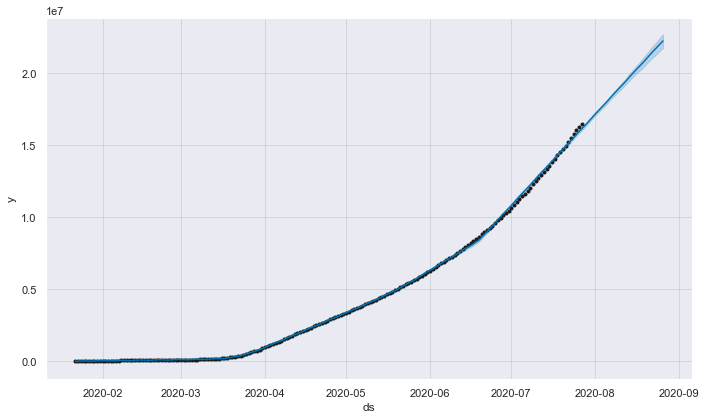

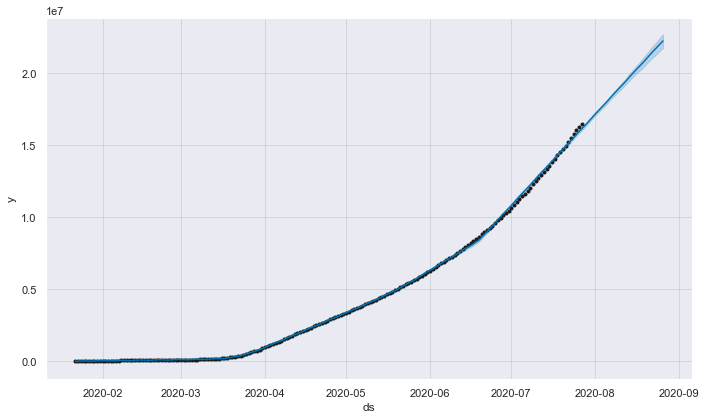

In [ ]:
0

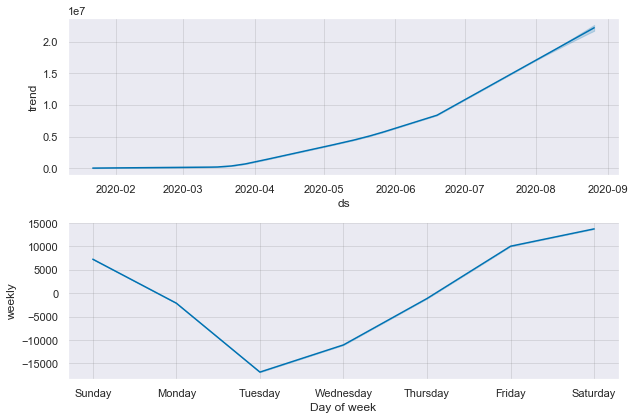

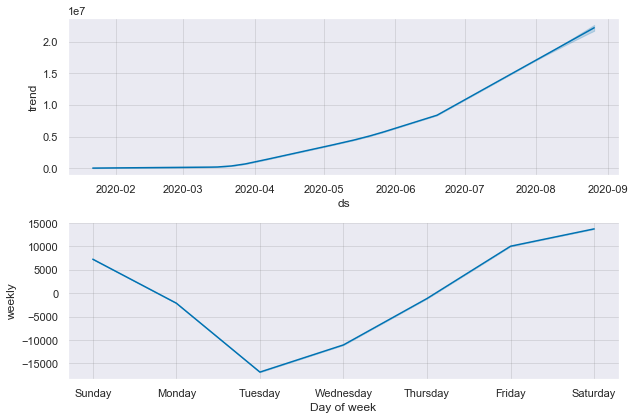

In [ ]:
model.plot_components(prediction)

In [ ]:
#### The prophet model identifies points at which the trend changes and those can be plotted.¶
from fbprophet.plot import add_changepoints_to_plot

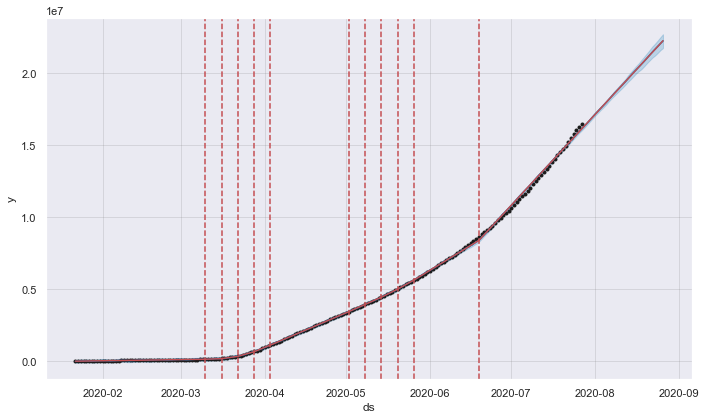

In [ ]:
fig=model.plot(prediction)

a=add_changepoints_to_plot(fig.gca(),model,prediction)

In [ ]:
from fbprophet.diagnostics import cross_validation

In [ ]:
df_cv=cross_validation(model,horizon='30 days',period='15 days',initial='90 days')
## horizon='365 days'--> for how many days we have to cross validate=====

## Computes forecasts from historical cutoff points Beginning from..

## (end - horizon) it means it is going to take that date that is (end - horizon) bcz on these date we have to just 
## cross-validate for the new dataset that we have to find out

## period=180 as from documentation of func as period=0.5*365=180 or {period=1/2*horizon value}
## initial -How many total no. of days we actually want-- 3*365 from documentation of function or  {initial=3*horizon}

INFO:fbprophet:Making 5 forecasts with cutoffs between 2020-04-28 00:00:00 and 2020-06-27 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-29,3.201064e+06,3.195872e+06,3.206328e+06,3185195,2020-04-28
1,2020-04-30,3.285432e+06,3.279479e+06,3.291630e+06,3268876,2020-04-28
2,2020-05-01,3.369640e+06,3.361087e+06,3.378356e+06,3355922,2020-04-28
3,2020-05-02,3.450902e+06,3.438559e+06,3.462812e+06,3437608,2020-04-28
4,2020-05-03,3.530365e+06,3.513950e+06,3.548535e+06,3515244,2020-04-28


In [ ]:
df_cv.shape

(150, 6)

In [ ]:
from fbprophet.diagnostics import performance_metrics

In [ ]:
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,2.731076e+10,165259.681472,129462.462411,0.016903,0.017772,0.000000
1,4 days,3.782418e+10,194484.405016,151678.545078,0.019368,0.022607,0.000000
2,5 days,5.185037e+10,227706.765522,175530.272014,0.021820,0.025735,0.066667
3,6 days,6.955547e+10,263733.715201,202525.306643,0.024599,0.026730,0.133333
4,7 days,9.034875e+10,300580.681849,232879.528793,0.027881,0.031285,0.200000


In [ ]:
from fbprophet.plot import plot_cross_validation_metric

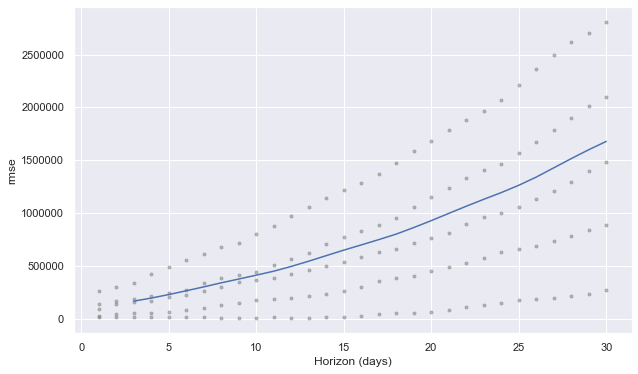

In [ ]:
df_performance=plot_cross_validation_metric(df_cv,metric='rmse')

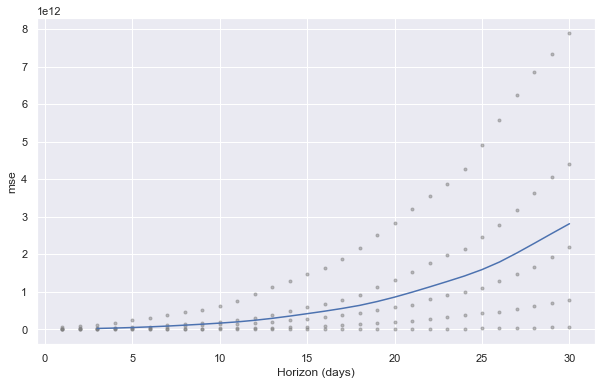

In [ ]:
df_performance=plot_cross_validation_metric(df_cv,metric='mse')

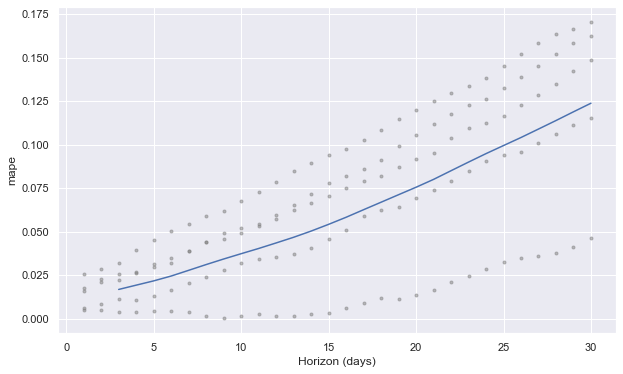

In [ ]:
df_performance=plot_cross_validation_metric(df_cv,metric='mape')